Wintersemester 2022/2023

# mug121 - Wissenschaftliche Datenverarbeitung: Python-Einführung – Notebook 5 - Objektorientierte Programmierung, Fun, Tipps und Ausblick

> Niklas Heidemann (heidemann@geo.uni-bonn.de)<br>
> Anna Zoporowski (zoporowski@geo.uni-bonn.de)

---
---

## Weiterer Ablauf: 

* Objektorientiertes Programmieren (Klassen `class`) und eigene Bibliotheken 



----
----
> ## Erinnerung: Modularisierung
> 
> ### Globale Module - Import von Bibliotheken
> 
> ```python
> # Import der gesamten Bibliothek:
> import bibliothek
> import bibliothek as kürzel
> # Import einzelner Funktionen:
> from bibliothek import funktion
> from bibliothek import funktion as kürzel
> ```
> 
> möglichst vermeiden:
> 
> ```from bibliothek import *```
> 
> * **!! importiert alle Funktionen des Moduls `bibliothek` und überschreibt / konkurriert mit build-in Funktionen !!**
> 
> ### Funktionsaufruf
> 
> Funktionsaufruf je nach Import mit `bibliothek.funktion()` bzw. `kürzel.funktion()`, `funktion()` oder `kürzel()`
> 
> 
> ### Lokale Module - Import von lokalen Paketen
> 
> * eigene Funktionen oder Klassen lassen sich in `.py`-Dateien oder `.ipynb`-Notebooks ablegen
> * Import von `name.py`  wie unter [Globale Module](#Globale-Module---Import-von-Bibliotheken "Kapitel > 'Globale Module'") z.B. mit 
> 
> ```python
> import name as kürzel
> ```
> 
> * Funktionsaufruf wie gewohnt mit `name.funktion()`, bzw. `kürzel.funktion()`
> * Funktionsnamen sind *case-sensitiv* (Groß- und Kleinschreibung wird beachtet)
> 
> **Ladereihenfolge: global oder lokal** - welches zuerst?
> 
> 1. lokale Module
> 2. globale Module
> 3. falls weder lokale noch globale Module unter verwendetem Namen gefunden werden können: > "ModuleNotFoundError"
> 
> **Außer:** Überschreiben gewünscht.
----

In [1]:
# Codezeile zum Testen
import meine_lokale_bib_njh as mlb


Das lokale Modul 'meine_lokale_bib.py' wurde erfolgreich geladen!


----
----

## Funktionen und Objekte

```python
def funktionsname(argumente):
    """Docstring"""
    funktionskörper
    return funktionsrückgabe
```


```python
class objectname01(object):
    """Docstring"""
    
    def __init__(self, argumente):
        self.argument = argument
        
       
    def __add__(self): # Rechenoperation "+" für dieses Objekt
        
        pass
        ...
        
    def funktionsname(self, zusätzliche argumente): # Vererbung und Weitergabe
        """Docstring"""
        funktionskörper
        return funktionsrückgabe
    
class objectname02(objectname01): # übernimmt alle Funktionen und Eigenschaften aus objectname01
    """Docstring"""
    
    def funktionsname02(self, zusätzliche argumente): # Vererbung und Weitergabe
        """Docstring"""
        funktionskörper
        return funktionsrückgabe
```

* **Vererbung** mittels `self`
  * Variablen
  * Argumente
  * Funktionen

----

In [2]:
# Codezeile zum Testen



In [3]:
class Konto(object): 

    def __init__(self, inhaber, kontonummer, 
                 kontostand, 
                 kontokorrent=0): 
        self.Inhaber = inhaber 
        self.Kontonummer = kontonummer 
        self.Kontostand = kontostand 
        self.Kontokorrent = kontokorrent
        print("Initialisierung des Kontos abgeschlossen!")
#         print("Kontoinhaber: {}, Kontonummer: {}".format(self.Inhaber, self.Kontonummer))

    def ueberweisen(self, ziel, betrag):
        if(self.Kontostand - betrag < -self.Kontokorrent):
            print("nicht möglich")
            # Deckung nicht genuegend
            return False  
        else: 
            print("Überweisung getätigt")
            self.Kontostand -= betrag 
#             self.Kontostand = self.Kontostand - betrag
            ziel.Kontostand += betrag 
            return True
 
    def einzahlen(self, betrag): 
        self.Kontostand += betrag 
 
    def auszahlen(self, betrag): 
        self.Kontostand -= betrag 
 
    def kontostand(self): 
        return self.Kontostand
    
    def print_kontoinfos(self, print_all=True):
        if print_all == False:
            print("Inhaber: {}".format(self.Inhaber))
            print("Nr.: {}".format(self.Kontonummer))
            print("Kontostand: {}".format(self.Kontostand))
        else:
            print("Inhaber: {}".format(self.Inhaber))
            print("Nr.: {}".format(self.Kontonummer))
            print("Kontostand: {}".format(self.Kontostand))
            print("Kontokorrent: {}".format(self.Kontokorrent))
            
    
    

In [4]:
konto1 = Konto("WissDVler*in", 123456789, 200)
print(konto1)

Initialisierung des Kontos abgeschlossen!


In [5]:
print(konto1.Inhaber)

WissDVler*in


In [6]:
print(konto1.Kontonummer)

123456789


In [7]:
konto2 = Konto("Empfänger*in", 987654321, 1000)

Initialisierung des Kontos abgeschlossen!


In [8]:
ueberweisung1 = konto1.ueberweisen(konto2, 300)
print(ueberweisung1)
if ueberweisung1 == True:
    print("Sie haben Ihre erste Überweisung getätigt, herzlichen Glückwunsch!")
else:
    print("Schade, mehr Geld nötig.")

nicht möglich
False
Schade, mehr Geld nötig.


In [9]:
print(konto1.Kontostand, konto2.Kontostand)

200 1000


In [10]:
konto1.auszahlen(150)

In [11]:
print(konto1.Kontostand)

50


In [12]:
konto2.ueberweisen(konto1, 400)

Überweisung getätigt


True

In [13]:
konto1.einzahlen(500)
print(konto1.Kontostand)

950


In [14]:
print(konto1.print_kontoinfos(print_all=False))

Inhaber: WissDVler*in
Nr.: 123456789
Kontostand: 950
None


In [15]:
konto2.Kontokorrent = -100

In [16]:
print(konto2.print_kontoinfos())

Inhaber: Empfänger*in
Nr.: 987654321
Kontostand: 600
Kontokorrent: -100
None


In [17]:
class User(object):
#     name = ""
 
    def __init__(self, name):
        self.name = name
 
    def printName(self):
        print("Name = " + self.name)
        
    def sayHello(self):
        print("Hello, my name is " + self.name)


class Programmer(User):
    def __init__(self, name):
        self.name = name
 
    def doPython(self):
        print("{} programming Python".format(self.name))
        
class XYZ(Programmer):
    pass

In [18]:
user1 = User("PC-User")
user1.name

'PC-User'

In [19]:
user1.printName()
user1.sayHello()


Name = PC-User
Hello, my name is PC-User


In [20]:
prog1 = Programmer("Programmer")
prog1.doPython()
print(prog1.name)


Programmer programming Python
Programmer


In [21]:
prog1.sayHello()

Hello, my name is Programmer


In [22]:
prog2 = Programmer(user1.name)
prog2.doPython()
print(prog2.name)

PC-User programming Python
PC-User


In [23]:
class CoffeeMachine(object):
# #     name = None
#     beans = 0
#     water = 0
 
    def __init__(self, name, beans, water):
        self.name = name
        self.beans = beans
        self.water = water
 
    def addBean(self):
        self.beans = self.beans + 1
 
    def removeBean(self):
        self.beans = self.beans - 1
 
    def addWater(self):
        self.water = self.water + 1
 
    def removeWater(self):
        self.water = self.water - 1
 
    def printState(self):
        print("Name  = " + self.name)
        print("Beans = " + str(self.beans))
        print("Water = " + str(self.water))

In [24]:
pythonBean = CoffeeMachine("Python Bean", 83, 20)
pythonBean.printState()
print("")
pythonBean.addBean()
pythonBean.printState()
pythonBean.removeWater()
pythonBean.printState()

Name  = Python Bean
Beans = 83
Water = 20

Name  = Python Bean
Beans = 84
Water = 20
Name  = Python Bean
Beans = 84
Water = 19


----
----

## Grundlegende Struktur unseres Programms / Moduls

### .py-Datei:

* auskommentierte Beschreibung und Header des Programms/Moduls
* allgemeine Infos
    * print-Statement zum Laden des Moduls
    * Version
* globale Importe
  * lokale Module
  * globale Module
* globale Variablen
* Funktionen / Definitionen (`def`)
* Objekte / Klassen (`class`)
  * Klassen mit Vererbung zwischen mehreren Klassen
  * Klassen ohne Vererbung

### mehrere .py-Dateien & setup.py

* mehrere einzelne Module / .py-Dateien lassen sich mittels einer `setup.py`-Datei zu einem ganzen lokalen Modul mit mehreren Untermodulen zusammensetzen.

----

In [25]:
# Codezeile zum Testen

# Print-Statement zu Beginn der lokalen Bibliothek:
import meine_lokale_bib_njh as mlb
# wird beim Laden der Bibliothek ausgegeben

pythonBean = mlb.CoffeeMachine("Python Bean", 83, 20)
pythonBean.printState()
print("")
pythonBean.addBean()
pythonBean.printState()
pythonBean.removeWater()
pythonBean.printState()

Name  = Python Bean
Beans = 83
Water = 20

Name  = Python Bean
Beans = 84
Water = 20
Name  = Python Bean
Beans = 84
Water = 19


----
----
## Ausblick

### Gemeinsam coden

* [cocalc.com](https://cocalc.com/features/jupyter-notebook)
* [colab (google)](https://colab.research.google.com/notebooks/intro.ipynb)

### Auswerten und Optimieren des Codes

* [**pyheat**](https://github.com/csurfer/pyheat "https://github.com/csurfer/pyheat") und [**pyheatmagic**](https://github.com/csurfer/pyheatmagic "https://github.com/csurfer/pyheatmagic")
* **timing**:
    ```python
    %timeit sum( range(3) )
    # führt den Code mehrfach aus und gibt die Geschwindigkeit des schnellsten Durchlaufs an
    ```
    
    
    ```python
    %%timeit
    for i in range(3):
        i += 1
    # wie %timeit nur für Code-Blöcke
    ```
    
    
    ```python
    %time sum( range(3) )
    # Geschwindigkeit eines einfachen Durchlaufs
    ```

### Dokumentieren, Debugging

* logging:
    ```python
    import logging
    # Bibliothek zum Initialisieren von Log-Dateien und hineinspeichern von Log, Warnungen, Fehlermeldungen
    ```

### Darstellung


* [Rougier, 2021: Scientific Visualization](https://github.com/rougier/scientific-visualization-book)
* [Scientific Color Maps](https://www.fabiocrameri.ch/colourmaps/)



----

In [26]:
%timeit sum( range(3) )

308 ns ± 9.99 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [27]:
%%timeit
for i in range(3):
    i += 1

323 ns ± 15.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [28]:
%time sum( range(3) )

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


3

In [29]:
import numpy as np
%time np.sum(range(3))

CPU times: user 47 µs, sys: 2 µs, total: 49 µs
Wall time: 53.9 µs


3

In [30]:
zahl = 1000000
liste = [i for i in range(zahl)]
array = np.arange(zahl)

In [31]:
%time sum( liste )

CPU times: user 6.59 ms, sys: 132 µs, total: 6.72 ms
Wall time: 6.68 ms


499999500000

In [32]:
%time np.sum(liste)

CPU times: user 71.4 ms, sys: 3.97 ms, total: 75.3 ms
Wall time: 74.6 ms


499999500000

In [33]:
%time sum( array )

CPU times: user 182 ms, sys: 7.66 ms, total: 190 ms
Wall time: 188 ms


499999500000

In [34]:
%time np.sum(array)

CPU times: user 1.16 ms, sys: 62 µs, total: 1.23 ms
Wall time: 777 µs


499999500000

**Merke: Je höher die Anzahl der Einträge und die Komplexität der Operation, desto eher lohnt es sich die zeitliche Effizienz der Rechendurchläufe konsistent auf NumPy ndarrays UND die dazugehörigen Funktionen von NumPy zu nutzen.**

Für kleinere Datenpakete kann sich das standardmäßige Python eher lohnen. Eine Vermengung von NumPy-Funktionen mit Standard-Datentypen und andersherum Standardfunktionen mit NumPy-Datentypen ist immer die ineffizienteste Lösung.

----

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


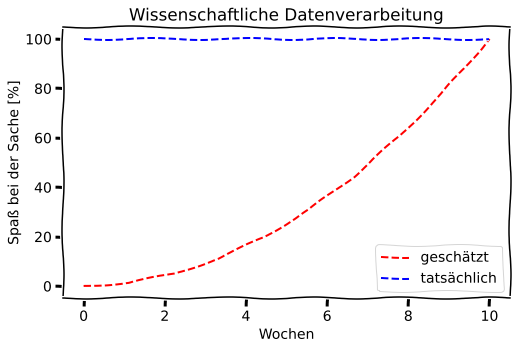

In [35]:
import numpy as np
import matplotlib.pyplot as plt

y_real = [100, 100]
x_real = [0, 10]
x_estimated = np.linspace(0, 10, 10)
y_estimated = x_estimated ** 2
# print(x_estimated, y_estimated)

plt.xkcd()
plt.figure(figsize=(8, 5))
plt.plot(x_estimated, y_estimated, label='geschätzt', ls='--', c='red')
plt.plot(x_real, y_real, label='tatsächlich', ls='--', c='blue')
plt.xlabel('Wochen')
plt.ylabel('Spaß bei der Sache [%]')
plt.title('Wissenschaftliche Datenverarbeitung')
plt.legend(loc='best')
plt.savefig('img/fun_in_curse.pdf', bbox_inches='tight')

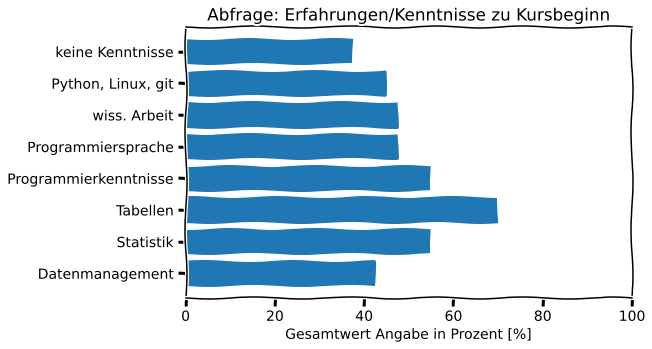

In [36]:
kurs_kenntnisse_beginn = {"Datenmanagement":1.7, 
                          "Statistik":2.2, 
                          "Tabellen":2.8, 
                          "Programmierkenntnisse":2.2, 
                          "Programmiersprache":1.9, 
                          "wiss. Arbeit":1.9,
                          "Python, Linux, git":1.8,
                          "keine Kenntnisse":1.5}

plt.figure(figsize=(8, 5))
plt.barh(list(kurs_kenntnisse_beginn.keys()), np.array(list(kurs_kenntnisse_beginn.values()))/4*100)
plt.xlim(0, 100)
plt.title("Abfrage: Erfahrungen/Kenntnisse zu Kursbeginn")
plt.xlabel("Gesamtwert Angabe in Prozent [%]")
plt.show()

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


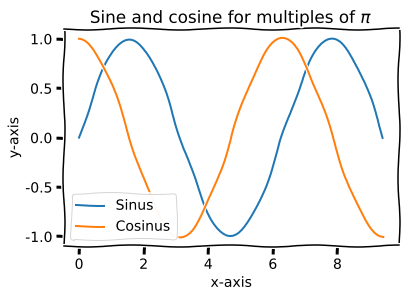

In [37]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 3*np.pi, 100)
y_sine = np.sin(x)
y_cosine = np.cos(x)

plt.figure()
plt.plot(x, y_sine, label='Sinus')
plt.plot(x, y_cosine, label='Cosinus')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title(r'Sine and cosine for multiples of $\pi$')
plt.legend(loc='best')

In [38]:
# Codezeile zum Testen


(768, 1024)
(768, 1024, 3)


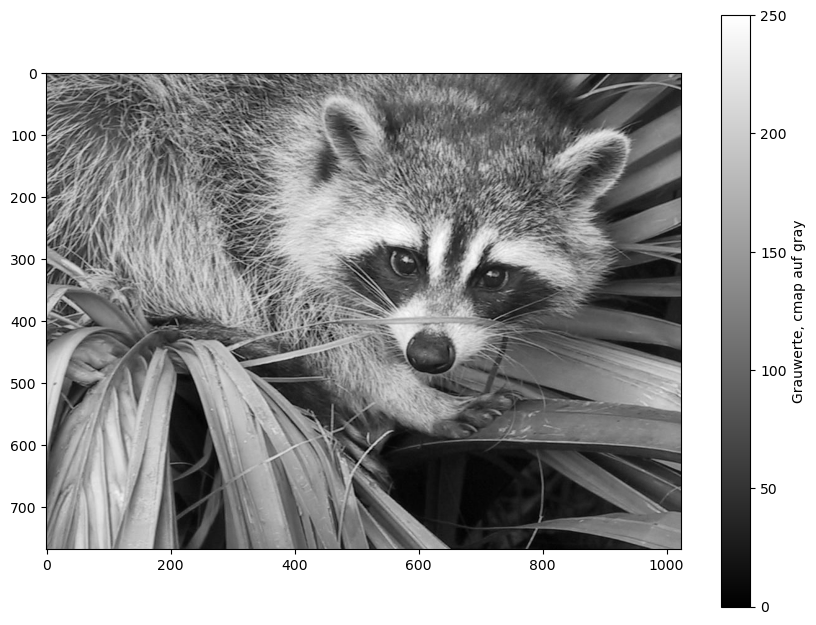

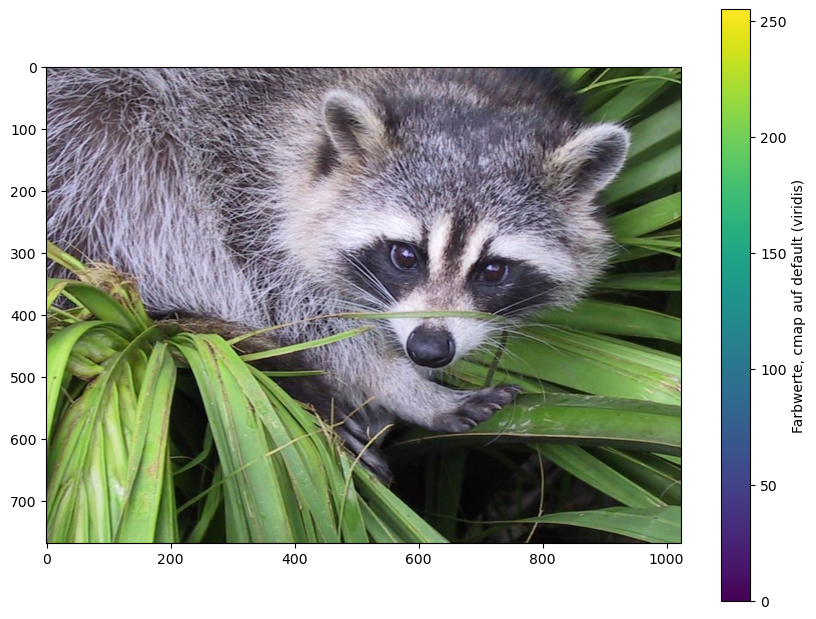

In [39]:
plt.rcdefaults()
def image_editing(is_gray=True):
    from scipy import misc
    face = misc.face(gray=is_gray)
    plt.figure(figsize=(10.24, 7.68))
    if is_gray == True:
        cmap="gray"
        plot = plt.imshow(face, cmap=cmap)
        label = "Grauwerte, cmap auf gray"
    else:
        plot = plt.imshow(face)
        label="Farbwerte, cmap auf default (viridis)"
    plt.colorbar(plot, label=label)
    print(face.shape) # <-- resolution = shape of the array
    
image_editing(True)
image_editing(False)

Text(0.5, 1.0, 'full image')

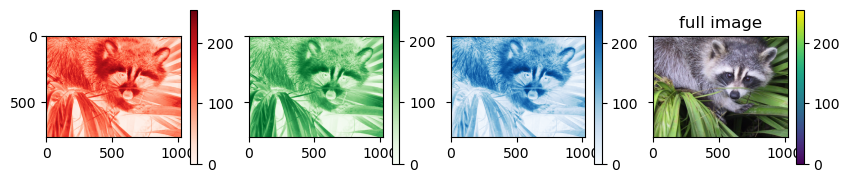

In [40]:
from scipy import misc
face = misc.face(gray=False)

fig, ax = plt.subplots(1, 4, figsize=(10, 2), sharey=True)
ax0, ax1, ax2, ax3 = ax[0], ax[1], ax[2], ax[3]

cmap = ax0.imshow(face[:, :, 0], cmap="Reds")
plt.colorbar(cmap, ax=ax0)

cmap = ax1.imshow(face[:, :, 1], cmap="Greens")
plt.colorbar(cmap, ax=ax1)

cmap = ax2.imshow(face[:, :, 2], cmap="Blues")
plt.colorbar(cmap, ax=ax2)

cmap = ax3.imshow(face[:, :, :])
plt.colorbar(cmap, ax=ax3)
ax3.set_title("full image")

In [41]:
import numpy as np
data = np.loadtxt("data/polydata_wissdv.dat")
x, y = data[:,0], data[:,1]
print(x.shape, y.shape)

(200,) (200,)


In [42]:
def fit_polynomial(x, y, deg):
    p = np.polyfit(x, y, deg=deg)
    print("fit parameters: {}".format(p))
    values = np.polyval(p, x)
    print("model values: {}".format(values.shape))
    return p, values

_, model_deg0 = fit_polynomial(x, y, 0)
_, model_deg1 = fit_polynomial(x, y, 1)
_, model_deg2 = fit_polynomial(x, y, 2)
_, model_deg3 = fit_polynomial(x, y, 3)
_, model_deg4 = fit_polynomial(x, y, 4)

fit parameters: [-869.65427136]
model values: (200,)
fit parameters: [ -50.51293731 1655.99259431]
model values: (200,)
fit parameters: [-5.24707872e-01  1.95784992e+00  7.85874012e+02]
model values: (200,)
fit parameters: [-3.30830299e-03 -2.84624245e-02 -1.78422612e+01  9.48803820e+02]
model values: (200,)
fit parameters: [-9.80927716e-06 -1.34644755e-03 -1.54372217e-01 -1.50605591e+01
  9.35209195e+02]
model values: (200,)


In [43]:
%%capture

plot_data = {"y":y, "deg=0":model_deg0, "deg=1":model_deg1, "deg=2":model_deg2, "deg=3":model_deg3, "deg=4":model_deg4}  # use subset for animation

from matplotlib import pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
%matplotlib inline

# Create animation
fig, ax = plt.subplots(figsize=(10, 4))

plot_cfg = {
    "cMin": 0,
    "cMax": 3,
    "logScale": False,
    
}

ax.scatter(x, y, marker="+", label="data")

def animate(i):
    if i == 0:
        ax.set_title("data")
    else:
        ax.plot(x, list(plot_data.values())[i], label=list(plot_data.keys())[i])
        ax.set_title(list(plot_data.keys())[i])
    

# fig.tight_layout()

# interval is time between frames in ms
anim = animation.FuncAnimation(fig, animate, frames=len(plot_data), interval=300, ) 
ax.legend()

# anim.save('fit_animation.avi')
# anim.save('fit_animation.mp4')
plt.show()

In [44]:
HTML(anim.to_jshtml())

In [45]:
# anim.save('fit_animation.avi')
# anim.save('fit_animation.mp4')